In [1]:
# Initialization
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml31.py
# MLP Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neural_network import MLPClassifier
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42).fit(X_train, y_train)
print(f'Accuracy: {mlp.score(X_test, y_test):.2%}')


Accuracy: 71.35%


In [5]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

mlp2 = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42).fit(Xs_train, y_train)
print(f'Accuracy: {mlp2.score(Xs_test, y_test):.2%}')

Accuracy: 75.00%


In [7]:
# %load ml32.py
# Hyperparameter tuning with grid search
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split as split, KFold
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = split(X, y, random_state=42)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
print(f'Accuracy without tuning: {model1.score(X_test, y_test):.2%}')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = dict(criterion=['gini', 'entropy'], max_leaf_nodes=range(2, 21))
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=kf, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
model2 = DecisionTreeClassifier(**grid.best_params_, random_state=42).fit(X_train, y_train)
print(f'Accuracy with tuning: {model2.score(X_test, y_test):.2%}')


Accuracy without tuning: 70.83%
Fitting 5 folds for each of 38 candidates, totalling 190 fits
{'criterion': 'gini', 'max_leaf_nodes': 7}
Accuracy with tuning: 74.48%


In [17]:
# Tune hyperparameters of SVC for the Pima Indian Diabetes dataset
from pandas import read_csv
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as split, GridSearchCV

header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = split(X, y, random_state=42)

# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

svc1 = SVC().fit(Xs_train, y_train)
print(f"svc1 accuracy: {svc1.score(Xs_test, y_test):.3%}")

svc1 accuracy: 72.917%


In [18]:
# Use GridSearchCV to tune the hyperparamters
params = {}
params["kernel"] = ["linear", "rbf", "polynomial"]
params["C"] = [0.001, 0.01, 0.1, 1, 10, 100]

gs = GridSearchCV(SVC(), params, cv=3, n_jobs=-1, verbose=2)
gs.fit(Xs_train, y_train)

print(f"Best paramesters: {gs.best_params_}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best paramesters: {'C': 1, 'kernel': 'linear'}


In [19]:
# Train SVC using the best parameters
svc2 = SVC(**gs.best_params_).fit(Xs_train, y_train)
print(f"svc2 accuracy: {svc2.score(Xs_test, y_test):.3%}")

svc2 accuracy: 72.917%


In [21]:
# %load ml33.py
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
pipe = Pipeline([('scaler', MinMaxScaler()), ('clf', SVC())])
pipe.fit(X_train, y_train)
print(f'Accuracy: {pipe.score(X_test, y_test):.2%}')

Accuracy: 73.96%


In [27]:
# Include one more step into the pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

pipe2 = Pipeline([('scaler', MinMaxScaler()), ('fs', SelectFromModel(RandomForestClassifier(), threshold='median')), ('clf', SVC())])
pipe2.fit(X_train, y_train)
print(f'Accuracy: {pipe2.score(X_test, y_test):.2%}')

Accuracy: 74.48%


In [26]:
pipe2

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('fs',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='median')),
                ('clf', SVC())])

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest

from sklearn.neighbors import KNeighborsClassifier

pipe3 = Pipeline([('scl', None), ('fs', None), ('clf', SVC())])

params1 = {}
params1['scl'] = [None, MinMaxScaler(), StandardScaler(), RobustScaler()]
params1['fs'] = [None, SelectFromModel(RandomForestClassifier(), threshold='median'), SelectKBest(k=4)]
params1['clf'] = [SVC()]
params1['clf__C'] = [0.001, 0.01, 0.1, 1, 10, 100]
params1['clf__gamma'] = [0.001, 0.01, 0.1, 1, 10, 100]

params2 = {}
params2['scl'] = [None, MinMaxScaler(), StandardScaler(), RobustScaler()]
params2['fs'] = [None, SelectFromModel(RandomForestClassifier(), threshold='median'), SelectKBest(k=4)]
params2['clf'] = [KNeighborsClassifier()]
params2['clf__n_neighbors'] = range(3, 10, 2)

params = [params1, params2]

gs = GridSearchCV(pipe3, params, cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 1, 'fs': SelectFromModel(estimator=RandomForestClassifier(), threshold='median'), 'scl': MinMaxScaler()}


In [46]:
best_pipe = gs.best_estimator_
best_pipe.fit(X_train, y_train)

print(f"Best pipe accuracy: {best_pipe.score(X_test, y_test):.3%}")

Best pipe accuracy: 75.000%


In [47]:
best_pipe

Pipeline(steps=[('scl', MinMaxScaler()),
                ('fs',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='median')),
                ('clf', SVC(C=1, gamma=1))])

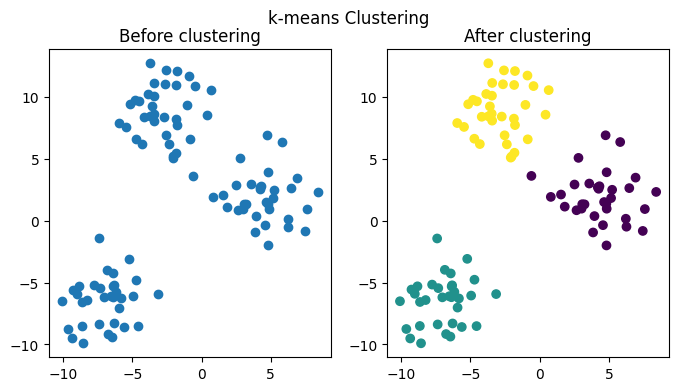

In [49]:
# %load ml34.py
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(centers=3, cluster_std=2, random_state=42)
km = KMeans(n_clusters=3).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('k-means Clustering')
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Before clustering')
ax2.scatter(X[:, 0], X[:, 1], c=km.labels_)
ax2.set_title('After clustering')
plt.show()


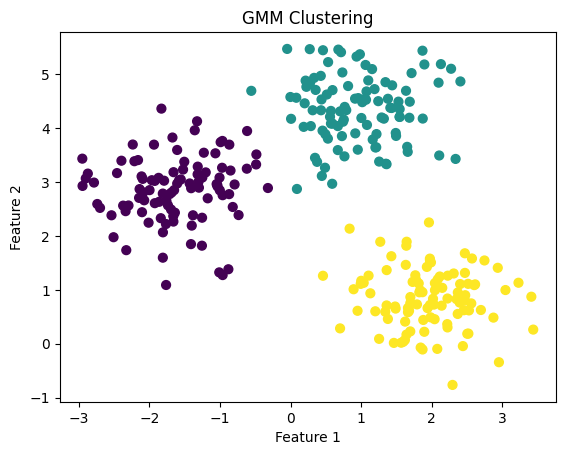

In [51]:
# %load ml35.py
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Fit a Gaussian Mixture Model and predict the cluster for each data point
labels = GaussianMixture(n_components=3).fit_predict(X)
# Plot the data points and cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


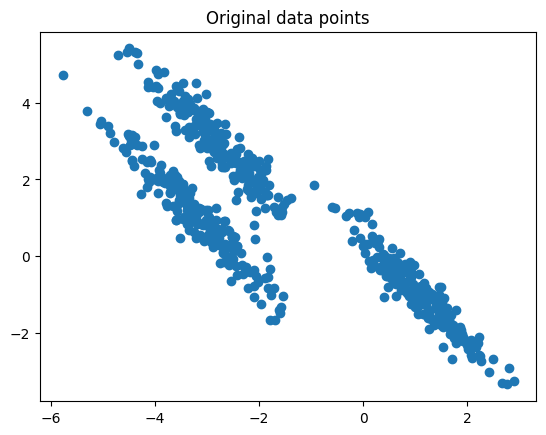

In [54]:
# Clustering of non-spherical clusters
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

X = read_csv("data/long_clusters.csv")

plt.scatter(X["Feature 0"], X["Feature 1"])
plt.title("Original data points")
plt.show()

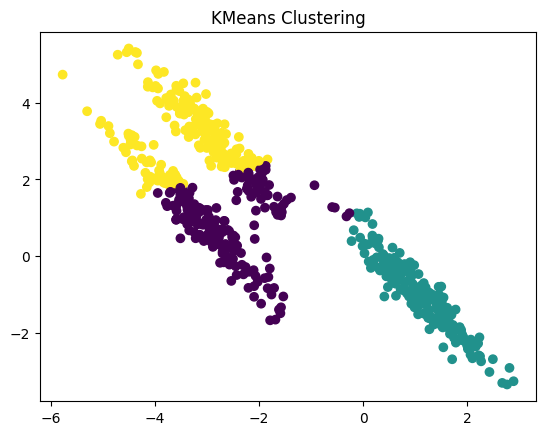

In [55]:
# k-means clustering
km = KMeans(n_clusters=3).fit(X)

plt.scatter(X["Feature 0"], X["Feature 1"], c=km.labels_)
plt.title("KMeans Clustering")
plt.show()

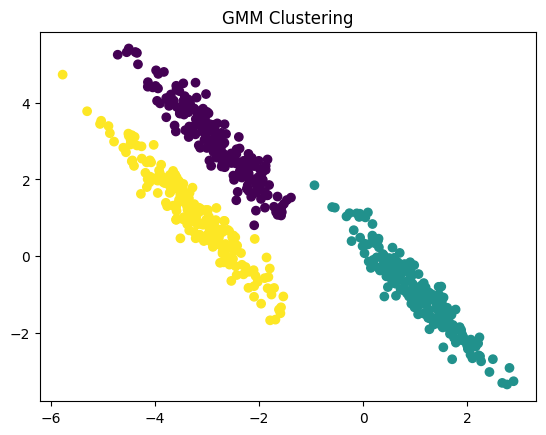

In [56]:
# Gaussian mixture model clustering
gmm = GaussianMixture(n_components=3).fit(X)

labels = gmm.predict(X)

plt.scatter(X["Feature 0"], X["Feature 1"], c=labels)
plt.title("GMM Clustering")
plt.show()

In [60]:
# %load ml36.py
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

pca = PCA(n_components=36)
X_reduced = pca.fit_transform(X)

print(X.shape, X_reduced.shape)
print(pca.explained_variance_ratio_.sum())


(1797, 64) (1797, 36)
0.9790223404507297


In [61]:
# Image compression using PCA
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti faces dataset
X, y = fetch_olivetti_faces(return_X_y=True)
X.shape, y.shape

((400, 4096), (400,))

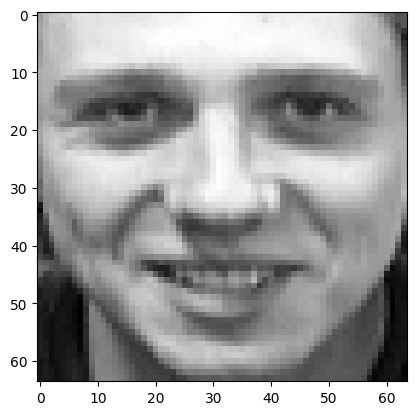

In [64]:
orim = X[111].reshape(64, 64)

plt.imshow(orim, cmap="gray")
plt.show()

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)
Xc = pca.fit_transform(X)

Xc.shape

(400, 64)

In [66]:
X_reconstructed = pca.inverse_transform(Xc)
X_reconstructed.shape

(400, 4096)

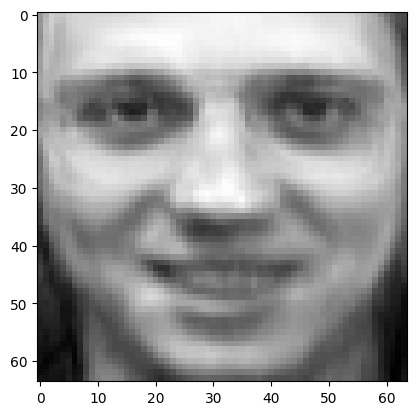

In [67]:
compim = X_reconstructed[111].reshape(64, 64)
plt.imshow(compim, cmap="gray")
plt.show()